In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/financial_transactions.csv")
print(df.head())

   transaction_id        date  customer_id   amount    type  \
0               1  26-10-2020          NaN      NaN  credit   
1               2  08-01-2020        466.0  1255.95  credit   
2               3  02-09-2019        110.0  7969.68   debit   
3               4  02-12-2020        142.0  2927.41  credit   
4               5  02-12-2020        944.0  4661.88   debit   

                                         description  
0                 Expect series shake art again our.  
1               Each left similar likely coach take.  
2  Direction wife job pull determine leader move ...  
3                    Agree reveal buy black already.  
4       Child relationship show college whom speech.  


In [4]:
df = df.dropna(subset=['customer_id'])
df['customer_id'] = df['customer_id'].astype(int)
df['amount'] = df['amount'].fillna(0)
print(df.head())

   transaction_id        date  customer_id   amount    type  \
1               2  08-01-2020          466  1255.95  credit   
2               3  02-09-2019          110  7969.68   debit   
3               4  02-12-2020          142  2927.41  credit   
4               5  02-12-2020          944  4661.88   debit   
5               6  25-04-2021          900  3649.68  credit   

                                         description  
1               Each left similar likely coach take.  
2  Direction wife job pull determine leader move ...  
3                    Agree reveal buy black already.  
4       Child relationship show college whom speech.  
5                                Century front item.  


In [5]:
customer_data = df.groupby('customer_id').agg(
    total_amount=('amount', 'sum'),
    avg_transaction_amount=('amount', 'mean'),
    num_transactions=('amount', 'count')
).reset_index()
print(customer_data.head())

   customer_id  total_amount  avg_transaction_amount  num_transactions
0            1     481760.83             4966.606495                97
1            2     493403.13             4699.077429               105
2            3     547765.88             5071.906296               108
3            4     505827.29             5558.541648                91
4            5     527998.55             4934.565888               107


In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data[["total_amount", "avg_transaction_amount", "num_transactions"]])

In [7]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)  # Tune 'eps' for better results
y_dbscan = dbscan.fit_predict(X_scaled)

# Apply Hierarchical Clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=3)
y_hierarchical = hierarchical.fit_predict(X_scaled)



In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Define a function to calculate clustering scores
def clustering_scores(X, labels):
    """Returns silhouette score, calinski-harabasz score, and davies-bouldin score."""
    if len(set(labels)) > 1:  # Ensure there are multiple clusters
        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
    else:
        silhouette, calinski, davies_bouldin = None, None, None
    return silhouette, calinski, davies_bouldin

# Compute scores for each clustering algorithm
silhouette_kmeans, calinski_kmeans, davies_bouldin_kmeans = clustering_scores(X_scaled, y_kmeans)
silhouette_dbscan, calinski_dbscan, davies_bouldin_dbscan = clustering_scores(X_scaled, y_dbscan)
silhouette_hierarchical, calinski_hierarchical, davies_bouldin_hierarchical = clustering_scores(X_scaled, y_hierarchical)


In [9]:
from tabulate import tabulate
import pandas as pd

# Create a DataFrame to store results
results_df = pd.DataFrame({
    "Algorithm": ["K-Means", "DBSCAN", "Hierarchical"],
    "Silhouette Score": [silhouette_kmeans, silhouette_dbscan, silhouette_hierarchical],
    "Calinski-Harabasz Score": [calinski_kmeans, calinski_dbscan, calinski_hierarchical],
    "Davies-Bouldin Index": [davies_bouldin_kmeans, davies_bouldin_dbscan, davies_bouldin_hierarchical]
})

# Print as a well-formatted table
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


╒════╤══════════════╤════════════════════╤═══════════════════════════╤════════════════════════╕
│    │ Algorithm    │   Silhouette Score │   Calinski-Harabasz Score │   Davies-Bouldin Index │
╞════╪══════════════╪════════════════════╪═══════════════════════════╪════════════════════════╡
│  0 │ K-Means      │           0.325349 │                  664.097  │                1.01564 │
├────┼──────────────┼────────────────────┼───────────────────────────┼────────────────────────┤
│  1 │ DBSCAN       │           0.224783 │                   14.9428 │                2.1634  │
├────┼──────────────┼────────────────────┼───────────────────────────┼────────────────────────┤
│  2 │ Hierarchical │           0.29355  │                  584.759  │                1.08643 │
╘════╧══════════════╧════════════════════╧═══════════════════════════╧════════════════════════╛


/tmp/ipython-input-3214647806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Algorithm", y=metric, data=results_df, palette="viridis")
/tmp/ipython-input-3214647806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Algorithm", y=metric, data=results_df, palette="viridis")
/tmp/ipython-input-3214647806.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Algorithm", y=metric, data=results_df, palette="viridis")


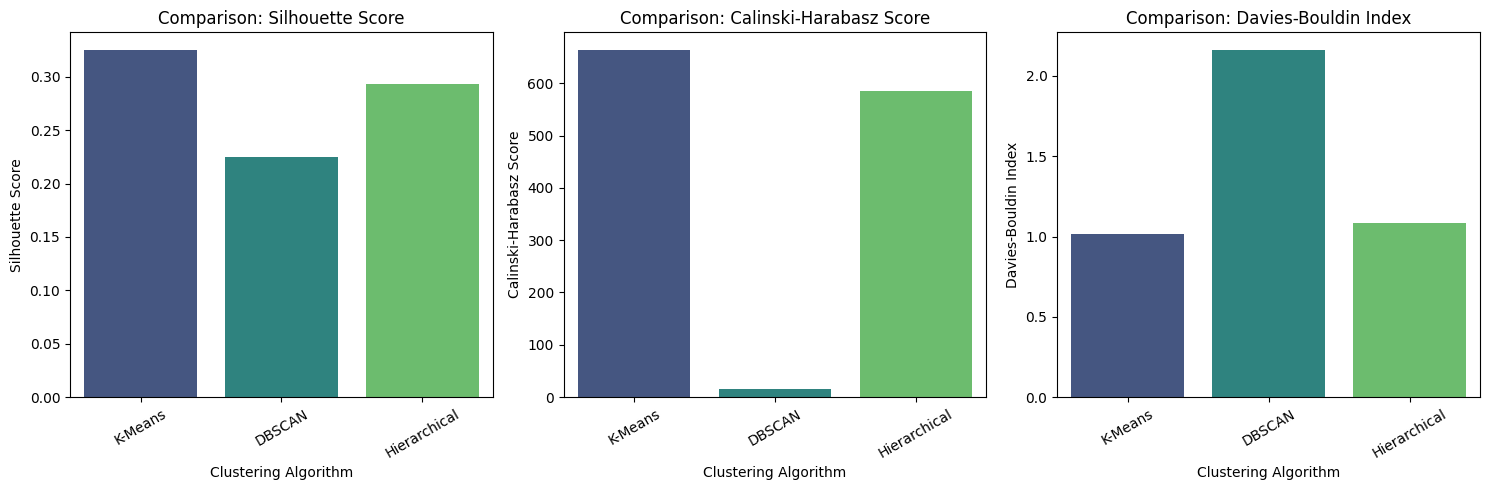

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 5))

# Define the metrics
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Index"]

# Plot bar charts for each metric
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x="Algorithm", y=metric, data=results_df, palette="viridis")
    plt.title(f"Comparison: {metric}")
    plt.xticks(rotation=30)
    plt.xlabel("Clustering Algorithm")
    plt.ylabel(metric)

# Show the plots
plt.tight_layout()
plt.show()
